In [619]:
import math
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np 
from sklearn.datasets import make_classification
import matplotlib. pyplot as plt 
import seaborn as sns 
from tqdm import tqdm 
sns. set(style="white")

In [705]:
class LogisticRegression:
    
    def __init__(self, X, target, max_iterations=50000, learning_rate=0.0001, tolerance=0.00001, index=[]):
        self.X = X
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.target = target
        self.tolerance = tolerance
        self.index = index
        
    def remove_index(self, X):
        for i in range(0, len(self.index)):
            X = X.drop((self.index[i]-1), axis=0)
        return X
    
    def data_split(self, X, target):
        X_test = X.drop([target], axis=1)
        Y_test = X[target]
        return X_test, Y_test
    
    def add_X0(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    def normalize_traindata(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = (X-self.mean) / self.std
        X = self.add_X0(X)
        return X
    
    def normalize_testdata(self, X):
        X = (X-self.mean) / self.std
        X = self.add_X0(X)
        return X
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def gradient(self, X, y):
        sig = self.sigmoid(np.matmul(X, self.w))
        return (sig - y).dot(X)
    
    def cost_function(self, X, y):
        sig = self.sigmoid(np.matmul(X, self.w))
        cost = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        return -cost.sum()
    
    def gradient_descent(self, X, y):
        self.w = np.ones(self.X.shape[1])
        cost = []
        prev_error = float('inf')
        for i in tqdm(range(self.max_iterations)):
            self.w = self.w - self.learning_rate * self.gradient(X, y)
            curr_error = self.cost_function(X, y)
            diff = prev_error - curr_error
            prev_error = curr_error
            cost.append(prev_error)
            if(diff < self.tolerance):
                print("Model stopped working")
                break;
        self.plot_cost(cost)
    
    def plot_cost(self, cost):
        s = np.array(cost)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='iterations', ylabel='cost', title=' cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True) 
        plt.show()
        
    def predict(self, X):
        X_test, y_test = self.data_split(X, self.target)
        X_test = self.normalize_testdata(X_test)
        sig = self.sigmoid(np.matmul(X_test, self.w))
        accuracy, precision, recall = self.evaluate(y_test, np.around(sig))
        print("Accuracy: ",accuracy)
        print("Precision: ", precision)
        print("Recall: ",recall)
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        true_positive = np.sum((y==1) & (y_hat==1))
        false_positive = np.sum((y==0) & (y_hat==1))
        false_negative = np.sum((y==1) & (y_hat==0))
        true_negative = np.sum((y==0) & (y_hat==0))
        accuracy = (true_positive + true_negative)/(y.shape[0])
        precision = true_positive/(true_positive + false_positive)
        recall = true_positive/(true_positive + false_negative)
        return accuracy, precision, recall
    
    def fit(self):
        X_train, y_train = self.data_split(self.remove_index(self.X), self.target)
        X_train = self.normalize_traindata(X_train)
        self.gradient_descent(X_train, y_train)
        self.plot(X_train, y_train)
        self.scatterPlt(X_train, y_train)
        self.plot3D(X_train, y_train)
        print("Weights: ",self.w)
        print("Shape of train data: ",X_train.shape)
    
    def plot(self, X_train, y_train):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(X_train[:, 0], X_train[:, 1], 
                     self.sigmoid(X_train.dot(self.w)), 
                     c = y_train[:], cmap='viridis', s=100);

        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

        
    def scatterPlt(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = -3, 3
        y_min, y_max = -3, 3

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 2),
                             np.linspace(y_min, y_max, 2))
        self_mean_reshaped = self.mean.values.reshape(1, -1)
        self_std_reshaped = self.std.values.reshape(1, -1)
        
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones((xx.size, 1))]
        probs = grid.dot(self.w).reshape(xx.shape)
        f, ax = plt.subplots(figsize=(14,12))
        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.06)
        ax.scatter(X_train[:, 1], X_train[:, 2], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
    
    def plot3D(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = 0,4
        y_min, y_max = 0,4
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 2),
                             np.linspace(y_min, y_max, 2))
        
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones((xx.size, 1))]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(X_train[:, 1], X_train[:, 2], 
                   c=y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()


In [706]:
train_data = pd.read_excel("/Data/data.xls", sheet_name='2004--2005 Data')
train_data.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [707]:
l = LogisticRegression(train_data, 'y', max_iterations=20000, learning_rate=0.001, tolerance=0.00001, index=[])

 65%|██████████████████████▊            | 13017/20000 [00:02<00:01, 4481.97it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model stopped working


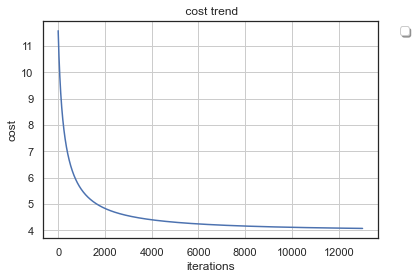

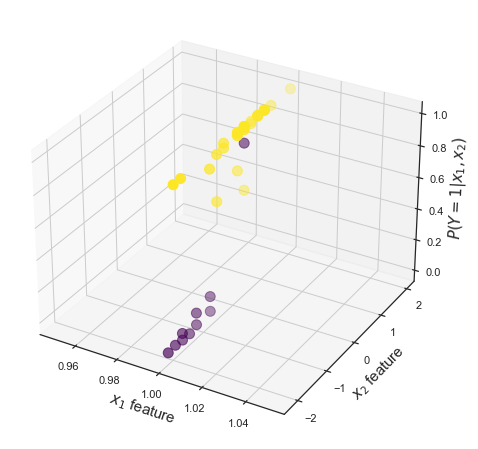

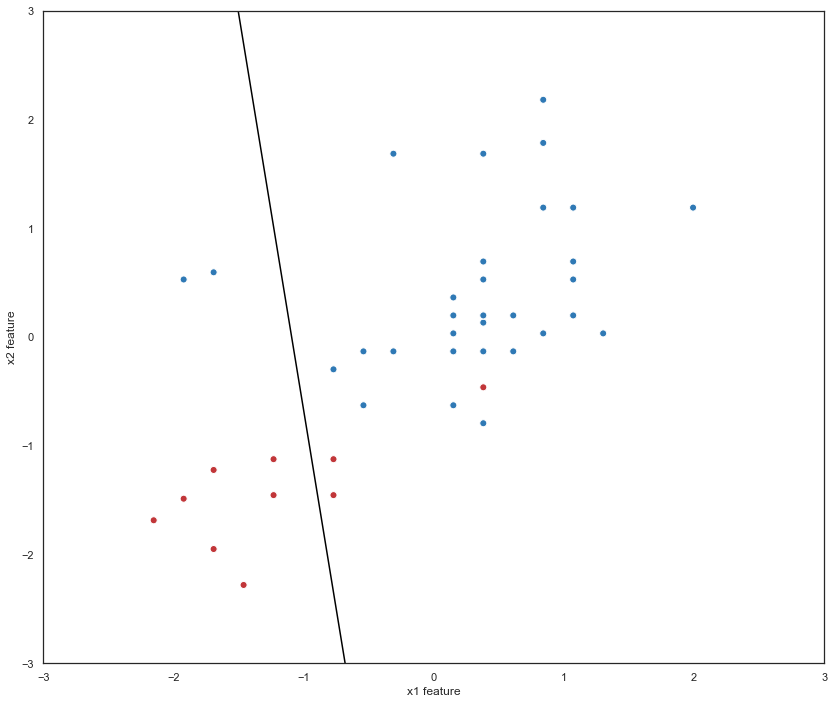

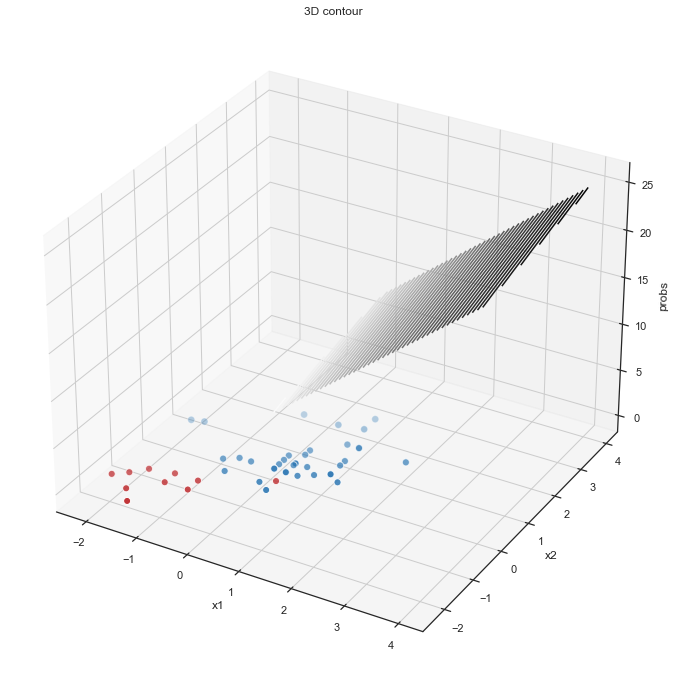

Weights:  [4.37921999 0.59932391 5.28069917]
Shape of train data:  (46, 3)


In [708]:
l.fit()

In [709]:
test_data = pd.read_excel("/Users/praneithranganath/Downloads/Lab3_data.xls", sheet_name='2004--2007 Data')
test_data.head()

,y,x1,x2
0,1,71.0,140
1,1,74.0,185
2,1,70.0,145
3,1,67.0,145
4,1,72.0,170


In [710]:
y_hat = l.predict(test_data)

Accuracy:  0.8947368421052632
Precision:  0.9444444444444444
Recall:  0.918918918918919


In [711]:
l_droppedindex = LogisticRegression(train_data, 'y', max_iterations=50000, learning_rate=0.001, 
                                    tolerance=0.0001, index=[1,39])

 13%|████▌                               | 6257/50000 [00:01<00:09, 4454.06it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model stopped working


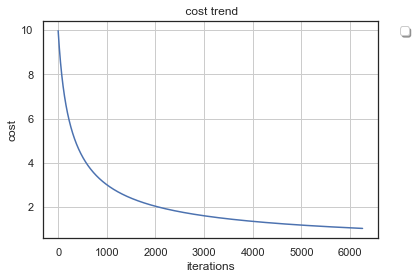

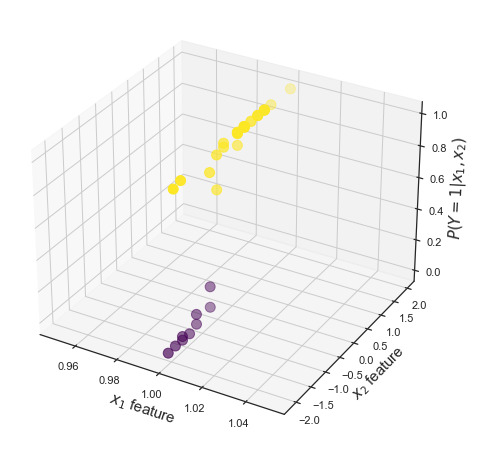

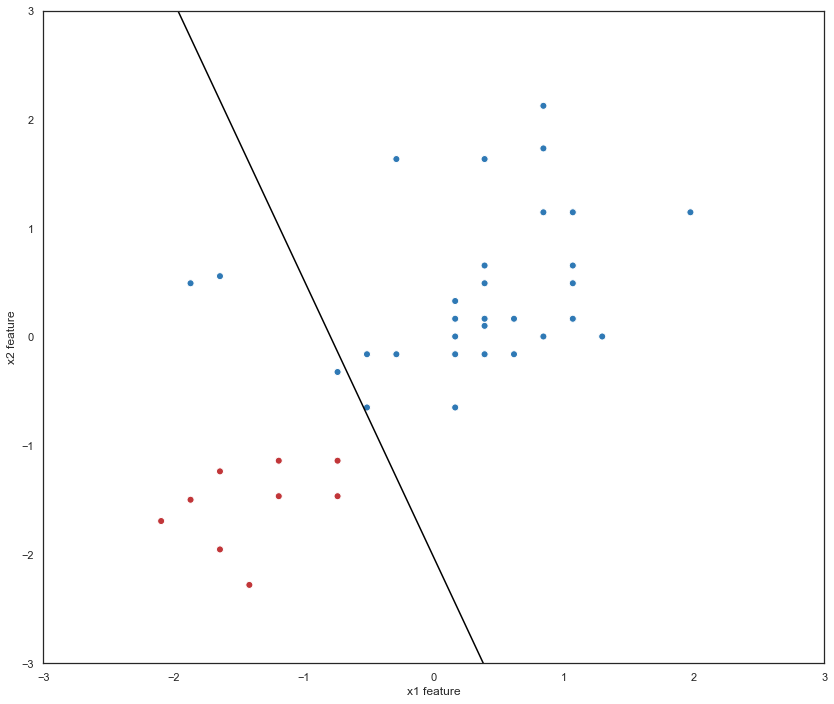

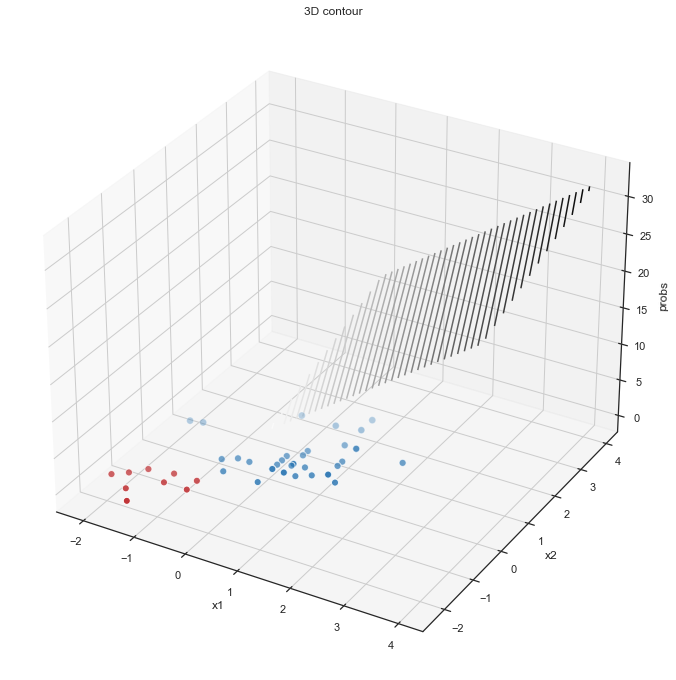

Weights:  [4.97510137 1.94403888 4.44065426]
Shape of train data:  (44, 3)


In [712]:
l_droppedindex.fit()

In [713]:
y__hat = l_droppedindex.predict(test_data)

Accuracy:  0.9157894736842105
Precision:  0.9459459459459459
Recall:  0.9459459459459459


We observe that by removing the misclassified points our Accuracy, Precision and Recall have improved by a small margin but the seperation in our decision boundary is more clear with reduced misclassifications.